In [1]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
df = pd.read_csv('data2.csv')
df

,X,Y,Class
0,-0.842046,0.408155,0
1,0.096394,-0.852114,1
2,-0.964828,0.034454,0
3,-0.164699,0.817332,1
4,0.274231,0.756343,1
...,...,...,...
295,-0.526197,0.815028,0
296,0.832952,0.086819,1
297,-0.900569,-0.555313,0
298,-0.534179,-0.513472,1


In [8]:
scaler = MinMaxScaler()
df['X'] = scaler.fit_transform(df[['X']])
df['Y'] = scaler.fit_transform(df[['Y']])
df

,X,Y,Class
0,0.111887,0.695514,0
1,0.553537,0.094573,1
2,0.054103,0.517320,0
3,0.430661,0.890623,1
4,0.637230,0.861541,1
...,...,...,...
295,0.260532,0.889525,0
296,0.900176,0.542289,1
297,0.084345,0.236098,0
298,0.256775,0.256050,1


In [9]:
def Algorithm(x , num_clusters):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(x.T, num_clusters, 2, error=0.005, maxiter=1000, init=None) # edit

    cluster_membership = np.argmax(u, axis=0)


    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(x[cluster_membership == i, 0], x[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    i = 1
    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], '*', markersize=20, markeredgewidth=2, label=f'Cluster Center {i}')
        i += 1
    
    ax.set_title(f'Fuzzy C-Means Clustering using {num_clusters} Clusters')
    ax.legend()
    
    plt.show()
    return fpc


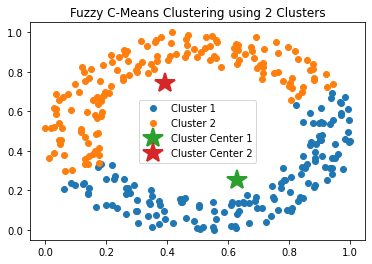

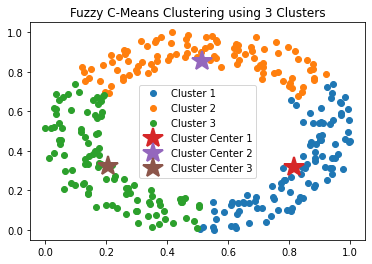

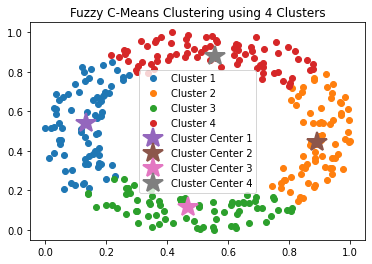

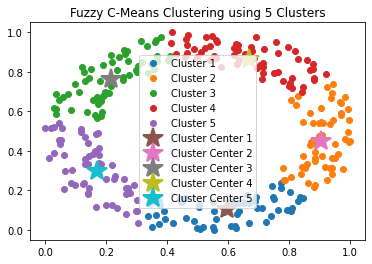

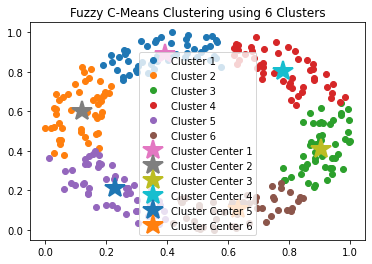

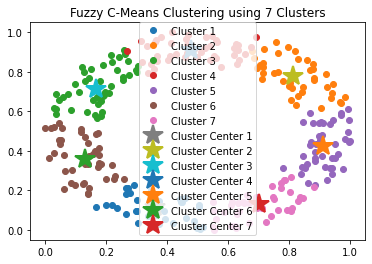

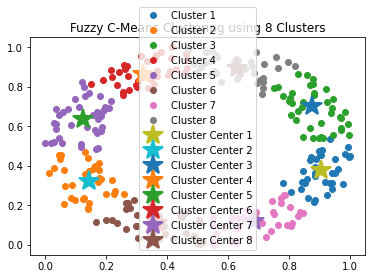

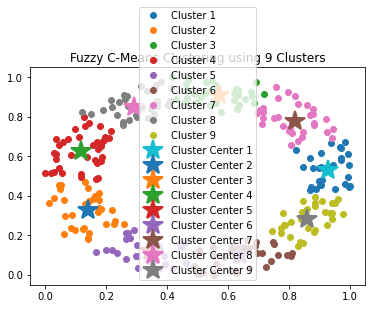

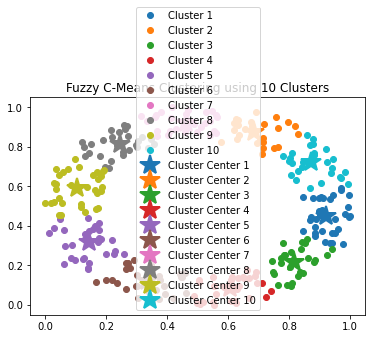

In [10]:
data = df[['X', 'Y']].values
fpcList = []
for cluster in range(2, 11):
    fpc = Algorithm(data, cluster)
    fpcList.append([cluster, fpc])

In [11]:
fpcList

[[2, 0.706668370365182],
 [3, 0.6774026695433875],
 [4, 0.6603496611933172],
 [5, 0.6500663901931779],
 [6, 0.6322102366255543],
 [7, 0.622997648169437],
 [8, 0.61178482882749],
 [9, 0.5955726099761626],
 [10, 0.5754502973514891]]